In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grouping(data, k=2, max_iter=100):
    """
    Função que separa os dados em diferentes classes

    Params:
        data (np.array): Conjunto de N pontos (x, y)
        k (int): Definição do número de grupos em que os dados serão separados (k >= 1)
        max_inter (int): Limitador do número de iterações

    Returns:
        grupos (np.array): Array com o a informação de grupo de cada um dos pontos
    """
    centroides = estimar_centroide_inicial(data, k)
    i = 0
    parar_loop = False
    while not parar_loop:
        i += 1
        matriz_distancias = calcular_matriz_distancias(data, centroides)
        agrupamento = agrupar_por_distancia(matriz_distancias)
        centroides_novos = calcular_centroide(data, agrupamento)
        convergido = np.array_equal(centroides_novos, centroides)
        centroides = centroides_novos
        alcancado_limite = i >= max_iter
        parar_loop = convergido or alcancado_limite
    return agrupamento


def estimar_centroide_inicial(data, k):
    max_values = data.max(axis=0)
    min_values = data.min(axis=0)
    n_features = data.shape[1]
    return np.random.uniform(low=min_values, high=max_values, size=(k, n_features))


def calcular_matriz_distancias(data, centroides):
    n_pontos = data.shape[0]
    k = centroides.shape[0]
    matriz_distancias = np.ones((n_pontos, k))
    for row, ponto in enumerate(data):
        for col, centroide in enumerate(centroides):
            matriz_distancias[row, col] = np.sqrt(np.sum(np.square(ponto - centroide)))
    return matriz_distancias


def agrupar_por_distancia(matriz_distancias):
    return np.argmin(matriz_distancias, axis=1)


def calcular_centroide(data, agrupamento):
    k = 1 + agrupamento.max()
    n_features = data.shape[1]
    centroides = np.ones((k, n_features))
    for centroide_calculado in range(k):
        mascara = agrupamento == centroide_calculado
        centroides[centroide_calculado] = data[mascara].mean(axis=0)  
    return centroides


def k_plot_2d(data, agrupamento):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:, 0], data[:, 1], s=50, c=plt.cm.tab20(agrupamento))
    plt.show()

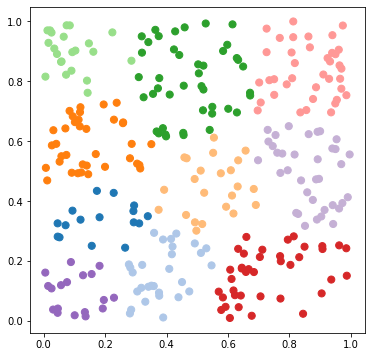

In [3]:
np.random.seed(42)
data = np.random.rand(300,2)
k = 10

agrupamento = grouping(data, k = k, max_iter = 100)
k_plot_2d(data, agrupamento)